# Part I - (Ford GoBike System Data Analysis)
## by (Daisy Bochaberi)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


The dataset contains:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type
- Member gender
- Member Birthday Year
- Bike Share


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile
import os
import requests
%matplotlib inline

In [2]:
# create folder to store the dataset
folder_name = 'Ford GoBike System Data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [3]:
# read data from the url
url = 'https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv'
response = requests.get(url)

In [4]:
# write data into a file in the created folder
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [5]:
# read data into a dataframe
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [8]:
df.shape

(183412, 16)

In [9]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### What is the structure of your dataset?

> The dataframe has 183412 rows and 16 columns. 9 columns contain numerical data while 7 columns contain 



### What is/are the main feature(s) of interest in your dataset?

> I am interested in the duration of the bike trips i.e `duration_sec` and how it relates with other features.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>`user type`, `member gender`, `start stations`, `end stations`, `start time` and `end time` will help support my investigation.

## Data Cleaning
- Drop null values
- Convert the start_time and end_time data types to datetime.
- Split start_time and end_time into date and months columns.



In [10]:
# make a copy of the dataframe for cleaning
df_clean=df.copy()

In [11]:
# drop null values
df_clean.dropna(inplace=True)
df_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [12]:
# convert datatype to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])
df_clean.start_time.dtypes

dtype('<M8[ns]')

In [13]:
df_clean['start_month']=df_clean['start_time'].dt.strftime('%B')
df_clean['start_day_of_week']=df_clean['start_time'].dt.strftime('%a')
df_clean['start_hour_of_day']=df_clean['start_time'].dt.hour
df_clean['end_month']=df_clean['end_time'].dt.strftime('%B')
df_clean['end_day_of_week']=df_clean['end_time'].dt.strftime('%a')
df_clean['end_hour_of_day']=df_clean['end_time'].dt.hour
df_clean['day_of_month'] = pd.DatetimeIndex(df_clean['start_time']).day

In [14]:
# Split date into day column
df_clean['day_of_month'] = pd.DatetimeIndex(df_clean['start_time']).day
# df_clean.day.unique()

In [15]:
# convert start_day_of_week and end_day_of_week into ordered categorical types
ordered_dict = {'start_day_of_week': ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],
            'end_day_of_week': ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
                   }

for var in ordered_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordered_dict[var])
    df_clean[var] = df_clean[var].astype(ordered_var)

In [16]:
df_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day_of_week,start_hour_of_day,end_month,end_day_of_week,end_hour_of_day,day_of_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,February,Thu,17,March,Fri,8,28
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,February,Thu,12,March,Fri,5,28
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,February,Thu,17,March,Fri,4,28
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,February,Thu,23,March,Fri,0,28
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959.0,Male,No,February,Thu,23,March,Fri,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,...,1996.0,Male,No,February,Fri,0,February,Fri,0,1
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,...,1984.0,Male,No,February,Fri,0,February,Fri,0,1
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,...,1990.0,Male,Yes,February,Fri,0,February,Fri,0,1
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,...,1988.0,Male,No,February,Fri,0,February,Fri,0,1


## Univariate Exploration


### Quiz 1: What is the distribution of duration of the trips?

Text(0.5, 0, 'Duration (Sec)')

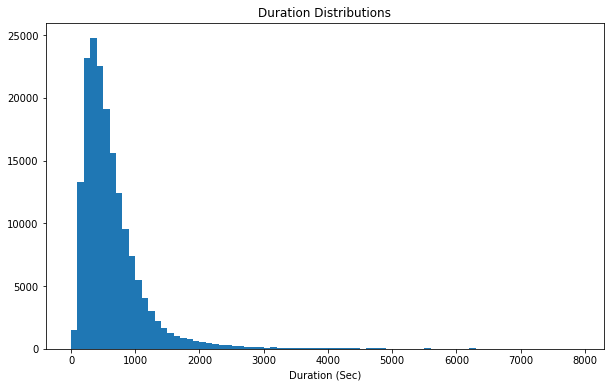

In [17]:
plt.figure(figsize=(10,6))
bins = np.arange(0, 8000, 100)

plt.hist(df_clean.duration_sec, bins=bins)
plt.title('Duration Distributions');
plt.xlabel('Duration (Sec)')

> The distribution of duration is skewed to the right.

### Quiz  2 : What is the Bike Service's distribution of trips in February?

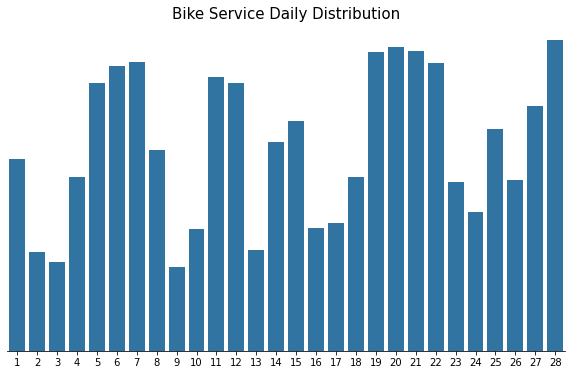

In [18]:
plt.figure(figsize=(10,6))
base_color = sb.color_palette()[0]
plt.title('Bike Service Daily Distribution', fontsize=15)
fig = sb.countplot(data=df_clean, x='day_of_month',color=base_color,order=np.arange(1 , 29))
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('');

>This plot shows the peak days for the month of February for Ford GoBike Service. The last day of the month happens to have one of the highest bike trips.

### Quiz 3 : What is the most popular time of day to go biking?

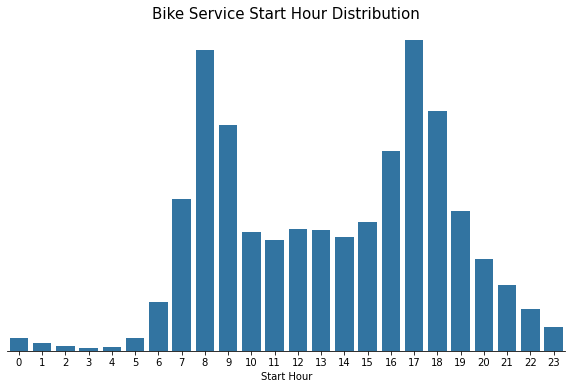

In [19]:
plt.figure(figsize=(10,6))
base_color = sb.color_palette()[0]
plt.title('Bike Service Start Hour Distribution', fontsize=15)
fig = sb.countplot(data=df_clean, x='start_hour_of_day',color=base_color,order=np.arange(0 , 24))
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('Start Hour');

>The analysis shows **8 am** and **5 pm** to be the popular times to go biking.

### Quiz 4 : What are the top  5 most popular start and end stations?

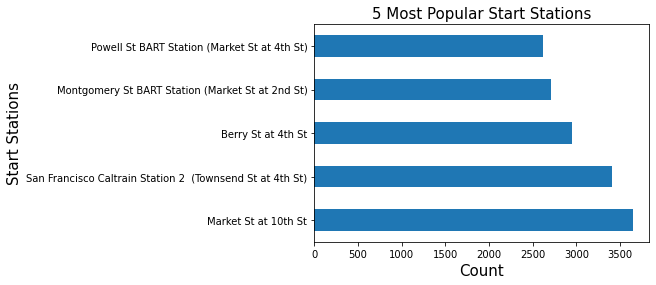

In [20]:
df_clean.start_station_name.value_counts(ascending=False).nlargest(5).plot(kind='barh')
plt.title('5 Most Popular Start Stations', fontsize=15)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Start Stations',fontsize=15);

> The Most Popular Start Stations are:
> - Market St at 10th St
> - San Francisco Caltrain Station 2 (Townsend St at 4th St)
> - Berry St at 4th St
> - Montgomery St BART Station (Market St at 2nd St)
> - Powell St BART Station (Market St at 4th St)

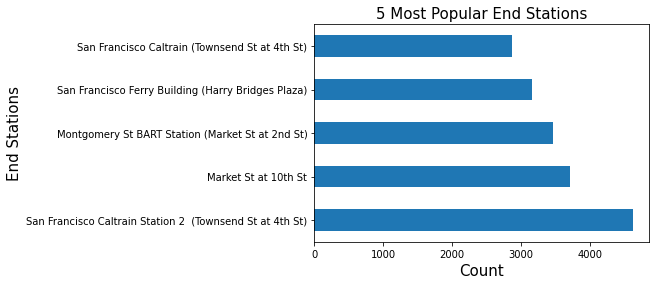

In [21]:
df_clean.end_station_name.value_counts(ascending=False).nlargest(5).plot(kind='barh')
plt.title('5 Most Popular End Stations', fontsize=15)
plt.xlabel('Count',fontsize=15)
plt.ylabel('End Stations',fontsize=15);

> The Most Popular End Stations are:
> - San Francisco Caltrain Station 2 (Townsend St at 4th St)
> - Market St at 10th St
> - Montgomery St BART Station (Market St at 2nd St)
> - San Francisco Ferry Building (Harry Bridges Plaza)
> - Powell St BART Station (Market St at 4th St)

### Quiz 5 : What is the comparison in user types?

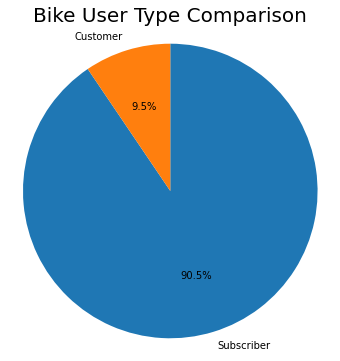

In [22]:
plt.figure(figsize=(8,6))
user_type_count=df_clean.user_type.value_counts()
plt.pie(user_type_count, labels = user_type_count.index, startangle = 90, counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Bike User Type Comparison', fontsize=20);


> From the analysis, more than three-quarter of the users are **Subscribers** and only 9.5% of the users are **Customers**.

### Quiz 6 : What is the comparison in gender?

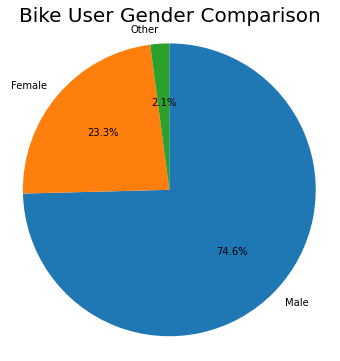

In [23]:
plt.figure(figsize=(10,6))
gender_count=df_clean.member_gender.value_counts()
plt.pie(gender_count, labels = gender_count.index, startangle = 90, counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Bike User Gender Comparison', fontsize=20);

The gender with the most number of users is Male with 74.6% of the total no of users.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Distribution of duration is skewed to the right. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>I dropped columns with null values, converted the datatype of `start_time` and `end_time` to datetime and split hour, day and month into new columns.

## Bivariate Exploration


### Quiz 7: What is the average riding duration based on user type?

In [24]:
# group the duration data based on user type
user_type_duration = df_clean.groupby('user_type').duration_sec.count()
user_type_duration

user_type
Customer       16566
Subscriber    158386
Name: duration_sec, dtype: int64

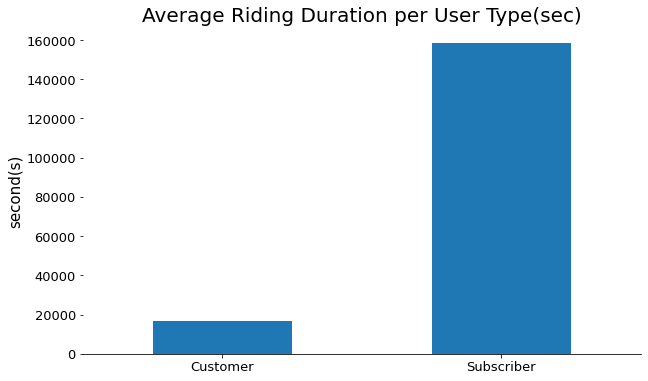

In [25]:
# plot a bar chart of duration in seconds against user type
fig = user_type_duration.plot(kind='bar', figsize=(10,6), color=base_color, fontsize=13);
fig.set_title("Average Riding Duration per User Type(sec)", fontsize=20)
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.spines['left'].set_visible(False)
fig.set_ylabel("second(s)", fontsize=15)
plt.xlabel('')
plt.xticks(rotation=0);

> Subscribers have a higher trip duration compared to customers.

### Quiz 8 : What is the number of trips in a week based on user type?

<Figure size 864x360 with 0 Axes>

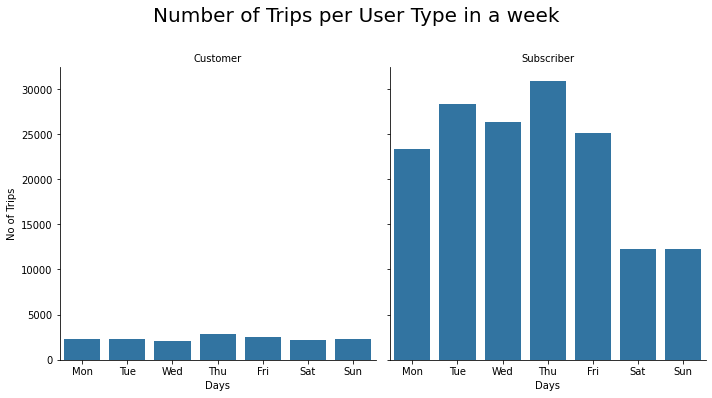

In [26]:
# plot a catplot of number of trips against user type
plt.figure(figsize = [12, 5])
graph = sb.catplot(data=df_clean, x='start_day_of_week', 
                   col="user_type", kind='count',color=base_color);
graph.set_axis_labels("Days", "No of Trips");
graph.set_titles("{col_name}");
graph.fig.suptitle('Number of Trips per User Type in a week',
                    y=1.1,fontsize=20);
graph.set_xticklabels();

### Quiz 9: What is the hourly trip distribution based on user type?

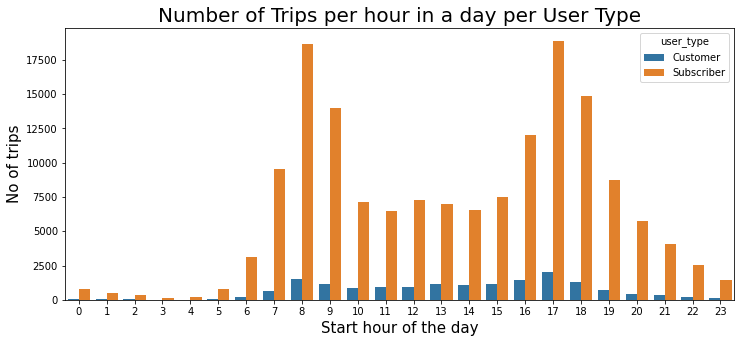

In [27]:
# plot a countplot of the no of trips per hour based on user type 
plt.figure(figsize = [12, 5])

sb.countplot(data=df_clean, x='start_hour_of_day', hue='user_type');
plt.title('Number of Trips per hour in a day per User Type', fontsize=20)
plt.xlabel('Start hour of the day',fontsize=15)
plt.ylabel('No of trips',fontsize=15);


> Subscribers have the highest no of trips with 5 pm being the most popular time.

### Quiz 10: What is the daily trip distribution based on member gender?

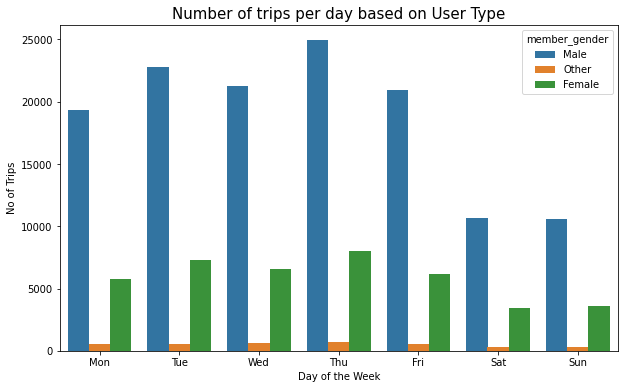

In [28]:
# plot a countplot to sow no of trips in a day per user type
plt.figure(figsize=(10,6))
plt.title('Number of trips per day based on User Type', fontsize=15)
bar = sb.countplot(data=df_clean, x='start_day_of_week', hue='member_gender')

bar.set(xlabel='Day of the Week', ylabel='No of Trips');

> Gender distribution per day is the same with Thursday recording the highest number. 

### Quiz 11: What is the trip duration based on member gender?

In [29]:
# group duration data by gender
member_gender_duration = df_clean.groupby('member_gender').duration_sec.count()
member_gender_duration

member_gender
Female     40805
Male      130500
Other       3647
Name: duration_sec, dtype: int64

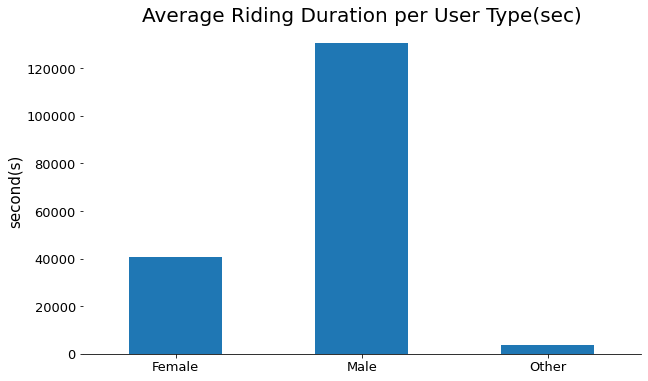

In [30]:
# plot bar chart to show trip duration per gender
fig = member_gender_duration.plot(kind='bar', figsize=(10,6), color=base_color, fontsize=13);
fig.set_title("Average Riding Duration per User Type(sec)", fontsize=20)
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.spines['left'].set_visible(False)
fig.set_ylabel("second(s)", fontsize=15)
plt.xlabel('')
plt.xticks(rotation=0);

In [31]:
df_clean.groupby('member_gender').duration_sec.describe()

,count,mean,std,min,25%,50%,75%,max
member_gender,,,,,,,,
Female,40805.0,778.872761,1787.003612,61.0,361.0,567.0,864.0,83195.0
Male,130500.0,672.394851,1504.794560,61.0,311.0,493.0,761.0,84548.0
Other,3647.0,997.328489,3526.245996,63.0,344.0,556.0,874.5,82512.0


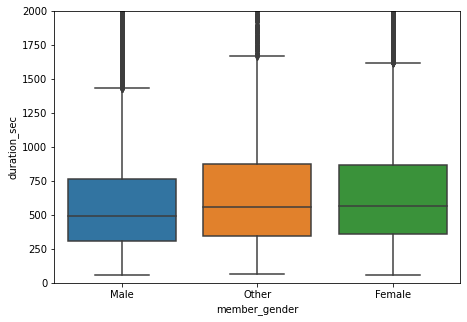

In [32]:
# plot boxplot to show trip duration in min per gender
plt.figure(figsize=(16,5))
plt.title('Usage Duration by User Type Boxplot')
plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean, x='member_gender', y='duration_sec');
plt.ylim(0,2000);

### Quiz 12: What is the user type distribution per station?


In [33]:
# group user type data by start station
user_type_stations = df_clean.groupby('start_station_name').user_type.value_counts().nlargest(10)
user_type_stations

start_station_name                                         user_type 
Market St at 10th St                                       Subscriber    3369
San Francisco Caltrain Station 2  (Townsend St at 4th St)  Subscriber    3169
Berry St at 4th St                                         Subscriber    2655
Montgomery St BART Station (Market St at 2nd St)           Subscriber    2500
San Francisco Caltrain (Townsend St at 4th St)             Subscriber    2340
Powell St BART Station (Market St at 4th St)               Subscriber    2294
San Francisco Ferry Building (Harry Bridges Plaza)         Subscriber    2124
Howard St at Beale St                                      Subscriber    2095
Steuart St at Market St                                    Subscriber    2012
Powell St BART Station (Market St at 5th St)               Subscriber    1941
Name: user_type, dtype: int64

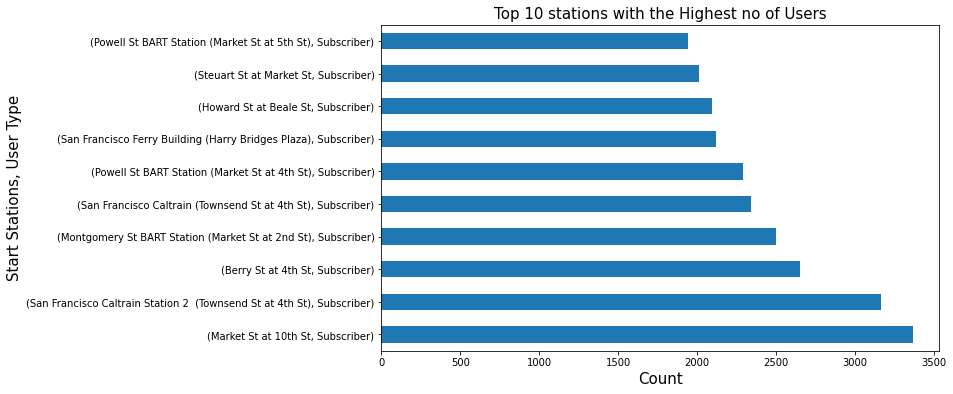

In [34]:
# plot a horizontal bar chart to show the distribution of user type per station
plt.figure(figsize=(10,6))
plt.title('Top 10 stations with the Highest no of Users', fontsize=15)
user_type_stations.plot(kind='barh')
plt.xlabel('Count',fontsize=15)
plt.ylabel('Start Stations, User Type',fontsize=15);

> From the plot, the number of subscribers in a station is higher than number of customers.
> **Market St at 10th St** records the highest number of subscribers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscribers have higher trip distribution frequency while that of customers is more stable.
> Male subscribers have higher trip duration than any other gender.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I am surprised that weekends happen to have the lowest number of trips

## Multivariate Exploration

### Quiz 13: What is the hourly duration usage per user type in seconds?

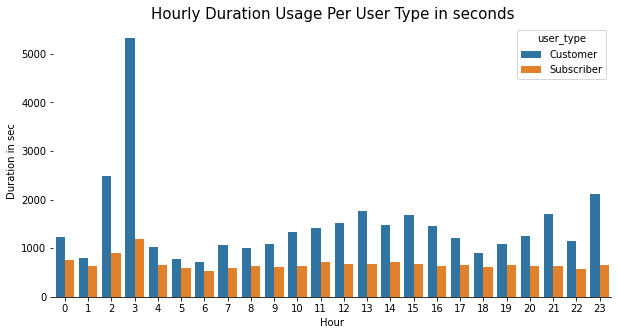

In [35]:

plt.figure(figsize=(10,5))
plt.title('Hourly Duration Usage Per User Type in seconds', fontsize=15)
chart = sb.barplot(data=df_clean, x='start_hour_of_day', y='duration_sec', errorbar=None, hue='user_type')
chart.set(xlabel='Hour', ylabel='Duration in sec');
chart.spines['top'].set_visible(False)
chart.spines['right'].set_visible(False)
chart.spines['left'].set_visible(False)

Customers have a higher hourly usage duration peaks than subscribers.

### Quiz 15: What is daily duration usage per user type in seconds?

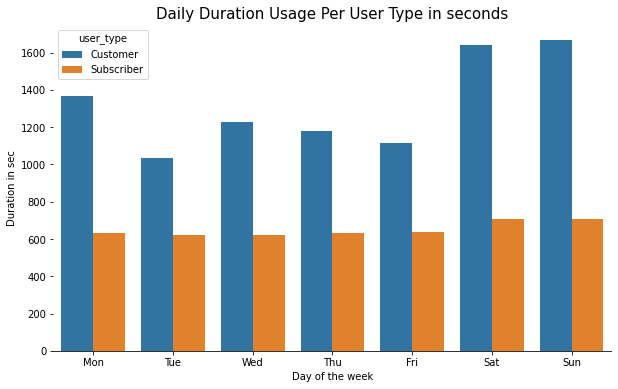

In [36]:
plt.figure(figsize=(10,6))
plt.title('Daily Duration Usage Per User Type in seconds', fontsize=15)
chart = sb.barplot(data=df_clean, x='start_day_of_week', y='duration_sec', errorbar=None, hue='user_type')
chart.set(xlabel='Day of the week', ylabel='Duration in sec');
chart.spines['top'].set_visible(False)
chart.spines['right'].set_visible(False)
chart.spines['left'].set_visible(False)

Customes have a higher daily usage duration compared to subscribers and weekends are their favourite biking time.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
Analysis of trip duration based on user type
> - Hourly Trip duration
>> Subscribers have more stable trip duration compared to customers.

>- Daily Trip duration
>>Weekends are popular for bike riding with Saturday being the most popular day.

### Were there any interesting or surprising interactions between features?

>It is interesting that 3 am records the highest hourly duration and that customers have a higher average trip duration compared to subscribers.

## Conclusions

> I analysed trip distribution based on user type. The most common user type is Subscribers who also have the highest number of trips hourly and daily.
> I also analysed the distribution of trips based on gender. The gender with the highest numbers was Male and it had the highest number of trips hourly and daily.


Export the cleaned dataframe to CSV file for use in presentation.

In [37]:
# Export cleaned dataframe to CSV file for slide deck

df_clean.to_csv('201902-fordgobike-tripdata-clean.csv', index=None)
df_new = pd.read_csv('201902-fordgobike-tripdata-clean.csv')
df_new

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day_of_week,start_hour_of_day,end_month,end_day_of_week,end_hour_of_day,day_of_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,February,Thu,17,March,Fri,8,28
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,February,Thu,12,March,Fri,5,28
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,February,Thu,17,March,Fri,4,28
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,February,Thu,23,March,Fri,0,28
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959.0,Male,No,February,Thu,23,March,Fri,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174947,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,...,1996.0,Male,No,February,Fri,0,February,Fri,0,1
174948,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,...,1984.0,Male,No,February,Fri,0,February,Fri,0,1
174949,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,...,1990.0,Male,Yes,February,Fri,0,February,Fri,0,1
174950,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,...,1988.0,Male,No,February,Fri,0,February,Fri,0,1
